<a href="https://colab.research.google.com/github/amirularsyad/MachineLearningCourse_HW_TelU/blob/main/6thWeek/K_Means_Clustering_Mall_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rayyan Ramanda (1103200202)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ganti path dengan lokasi dataset yang ada
file_path = ('/content/drive/MyDrive/Dataset/Mall_Customers.csv')

# membaca dataset kedalam dataframe
data = pd.read_csv(file_path)

# menampilkan beberapa baris pertama dari dataframe
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Menggunakan kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' untuk clustering
X = data.iloc[:, [3, 4]].values

In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Menentukan jumlah cluster (K) dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

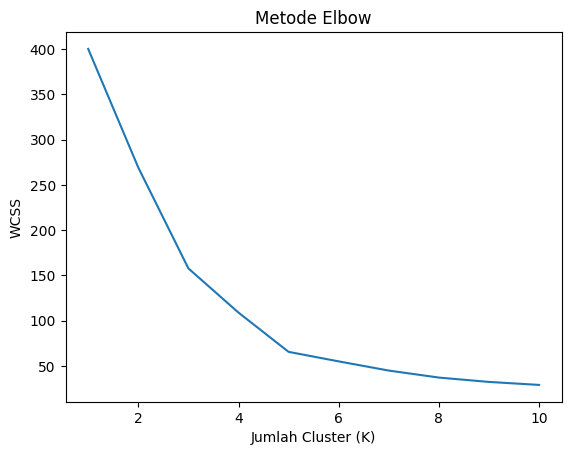

In [ ]:
# Menampilkan grafik Elbow
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')  # WCSS (Within-Cluster-Sum-of-Squares) menurun dengan peningkatan K
plt.show()

In [ ]:
# Melakukan K-Means Clustering dengan jumlah cluster yang telah dipilih (misalnya, K=5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)


KMeans(n_clusters=5, n_init=10, random_state=0)

In [ ]:
# Menambahkan label kluster ke data
data['Cluster'] = kmeans.labels_

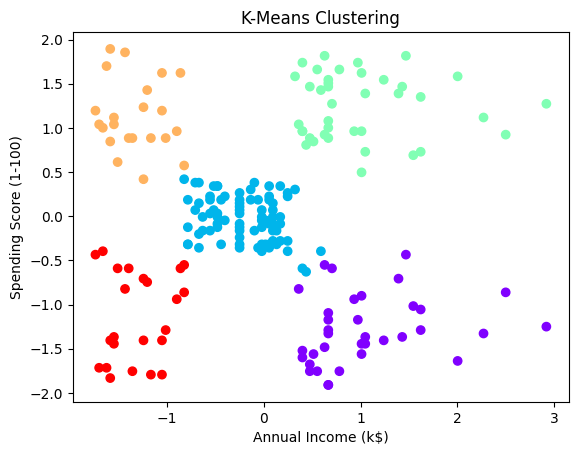

In [ ]:
# Menampilkan hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

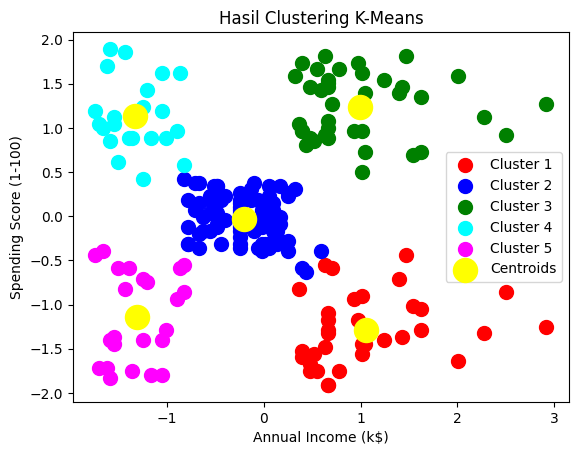

In [ ]:
# Menampilkan sebaran data dan hasil clustering dengan warna yang berbeda
plt.scatter(X[data['Cluster'] == 0, 0], X[data['Cluster'] == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[data['Cluster'] == 1, 0], X[data['Cluster'] == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[data['Cluster'] == 2, 0], X[data['Cluster'] == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[data['Cluster'] == 3, 0], X[data['Cluster'] == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[data['Cluster'] == 4, 0], X[data['Cluster'] == 4, 1], s=100, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Hasil Clustering K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

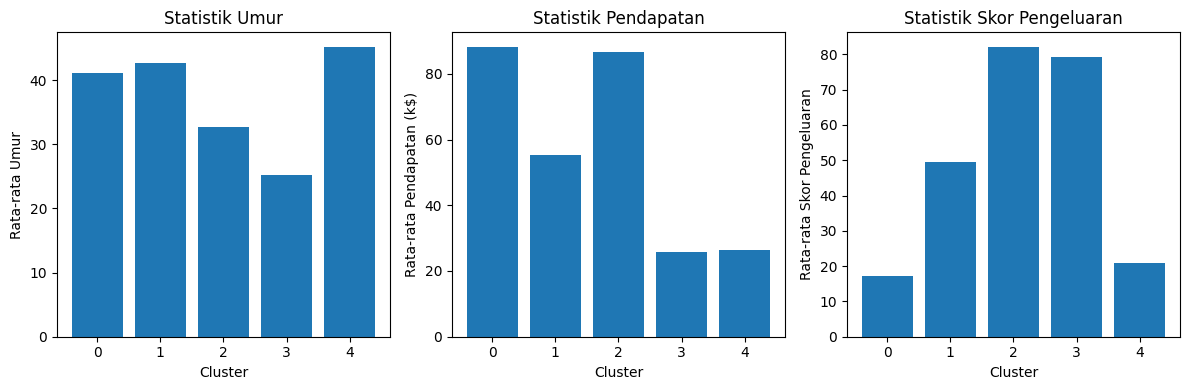

In [ ]:
# Visualisasi statistik untuk setiap kluster
cluster_stats = data.groupby('Cluster').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean', 'Gender': 'count'})
cluster_stats.columns = ['Rata-rata Umur', 'Rata-rata Pendapatan', 'Rata-rata Skor Pengeluaran', 'Jumlah Pelanggan']

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(cluster_stats.index, cluster_stats['Rata-rata Umur'])
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Umur')
plt.title('Statistik Umur')

plt.subplot(1, 3, 2)
plt.bar(cluster_stats.index, cluster_stats['Rata-rata Pendapatan'])
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Pendapatan (k$)')
plt.title('Statistik Pendapatan')

plt.subplot(1, 3, 3)
plt.bar(cluster_stats.index, cluster_stats['Rata-rata Skor Pengeluaran'])
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Skor Pengeluaran')
plt.title('Statistik Skor Pengeluaran')

plt.tight_layout()
plt.show()
